# Prediction of Different cryptocurrencies prices and calculation of correlation

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# importing packages for plotting candlestick graph
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

#importing packages for the prediction of time-series data
from fbprophet import Prophet
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import DataFrame

#configuring the Environment
color = sns.color_palette()
%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999


Reading CSV files of different CryptoCurrencies and put it into dictionary


In [3]:
crypto_data = {}

crypto_data['bitcoin'] = pd.read_csv('./input/bitcoin_price.csv', parse_dates=['Date'])
crypto_data['bitcoin_cash'] = pd.read_csv("./input/bitcoin_cash_price.csv", parse_dates=['Date'])
crypto_data['dash'] = pd.read_csv("./input/dash_price.csv", parse_dates=['Date'])
crypto_data['ethereum'] = pd.read_csv("./input/ethereum_price.csv", parse_dates=['Date'])
crypto_data['iota'] = pd.read_csv("./input/iota_price.csv", parse_dates=['Date'])
crypto_data['litecoin'] = pd.read_csv("./input/litecoin_price.csv", parse_dates=['Date'])
crypto_data['monero'] = pd.read_csv("./input/monero_price.csv", parse_dates=['Date'])
crypto_data['nem'] = pd.read_csv("./input/nem_price.csv", parse_dates=['Date'])
crypto_data['neo'] = pd.read_csv("./input/neo_price.csv", parse_dates=['Date'])
crypto_data['numeraire'] = pd.read_csv("./input/numeraire_price.csv", parse_dates=['Date'])
crypto_data['ripple'] = pd.read_csv("./input/ripple_price.csv", parse_dates=['Date'])
crypto_data['stratis'] = pd.read_csv("./input/stratis_price.csv", parse_dates=['Date'])
crypto_data['waves'] = pd.read_csv("./input/waves_price.csv", parse_dates=['Date'])


# Closing Price distribution of different cryptocurrencies

Taking different cryptocurrencies in dataframes and then selecting columns which is used for plotting prices.

/home/aashi/anaconda3/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


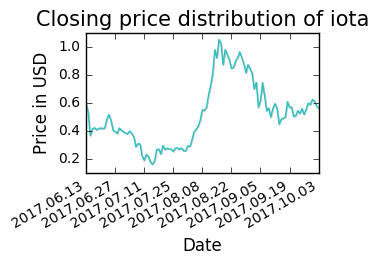

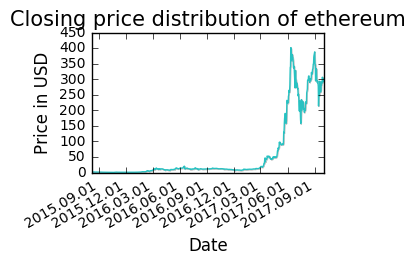

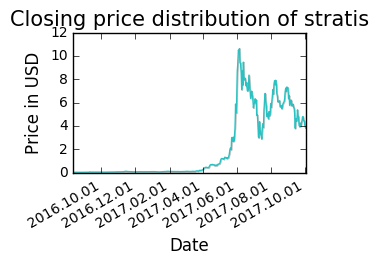

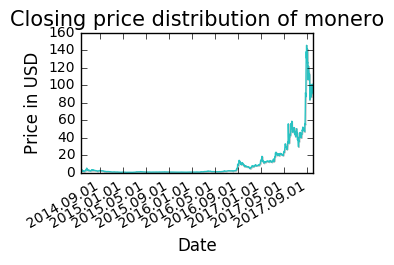

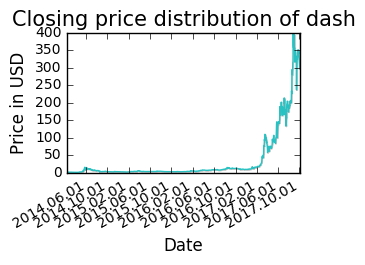

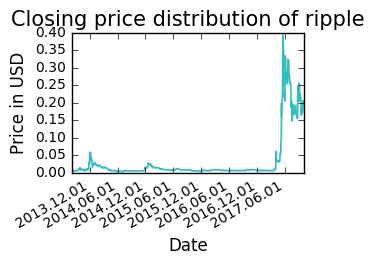

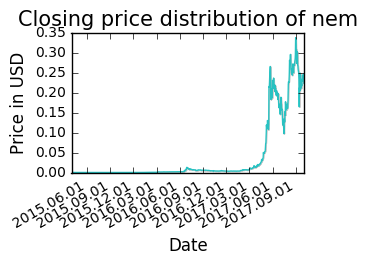

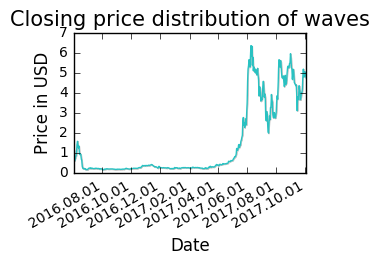

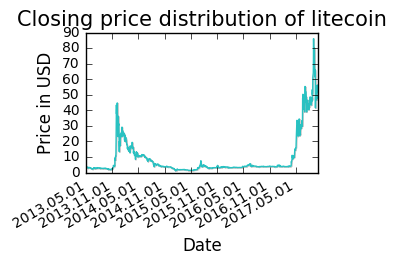

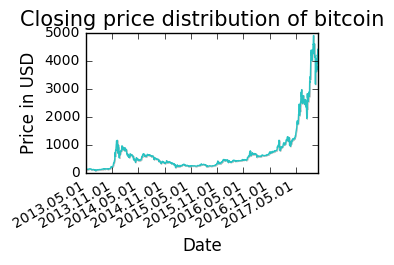

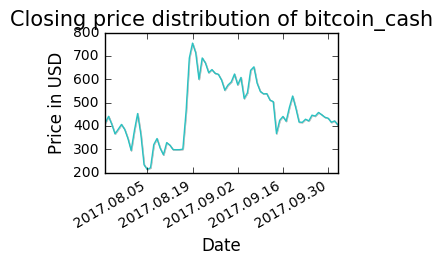

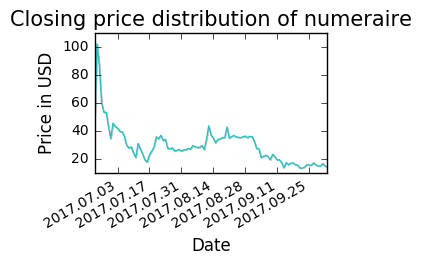

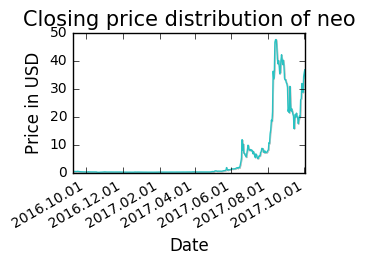

In [4]:

for coin in crypto_data:
    df = pd.DataFrame(crypto_data[coin])
    df = df[['Date' , 'Close']]
    
    df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x)) # making new column 'Date_mpl' by using date2num lamba function
    fig, ax = plt.subplots(figsize=(3,2))
    sns.tsplot(df.Close.values, time=df.Date_mpl.values, alpha=0.8, color=color[3], ax=ax)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
    fig.autofmt_xdate()
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    title_str = "Closing price distribution of " + coin
    plt.title(title_str, fontsize=15)
    plt.show()

# CandleStick Chart for different Cryptocurrencies

CandleStick Chart is used for the representation financial data. Chart will be based on four columns such as Open, Close, High, Low. The hollow and filled portion in chart represented as if stocks closes higher than its opening values with top line represent as closing price and bottom line as opening price and if stocks closes lower than its opening values with top line represent as opening price and bottom lines as closing price respectively.

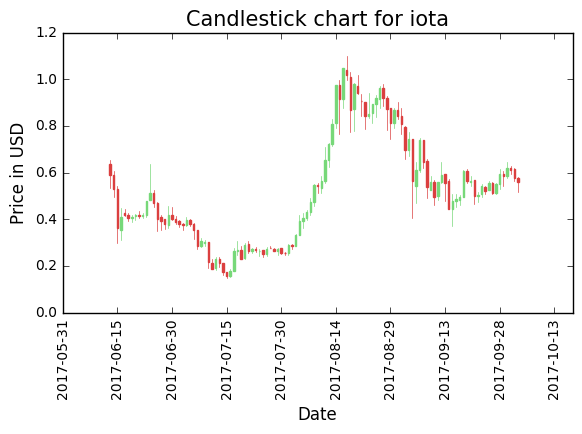

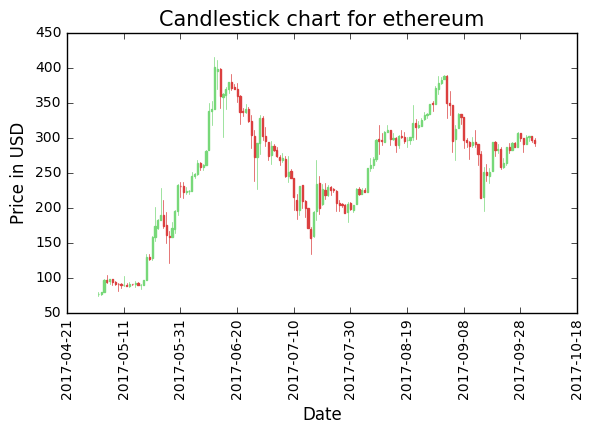

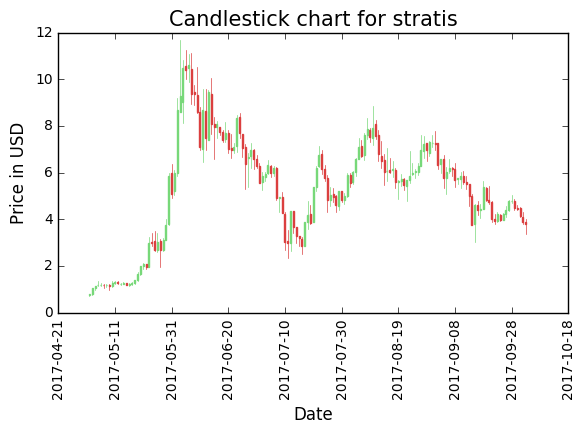

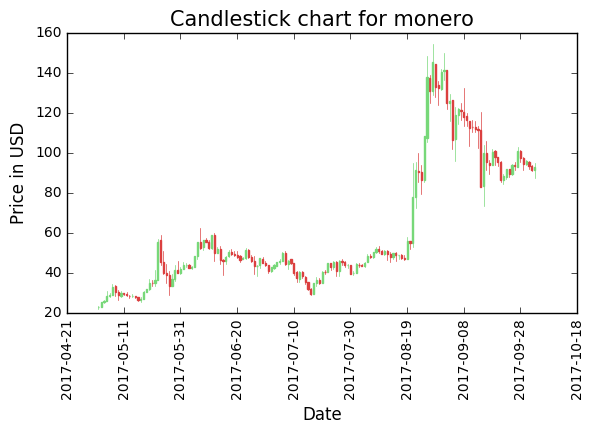

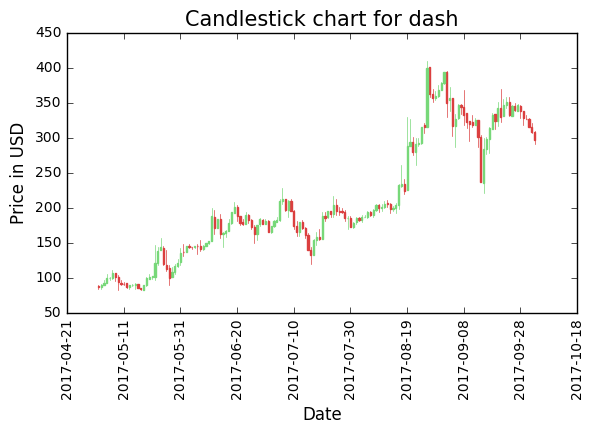

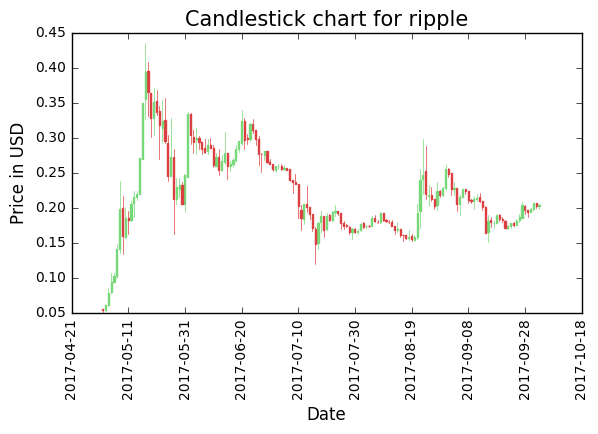

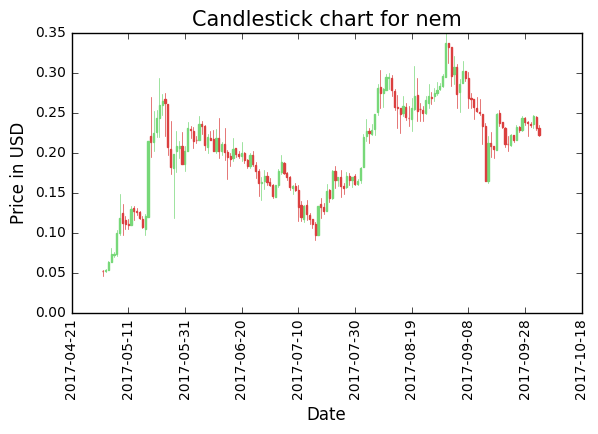

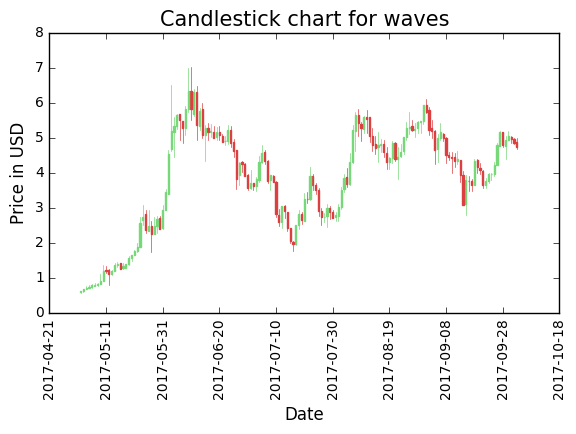

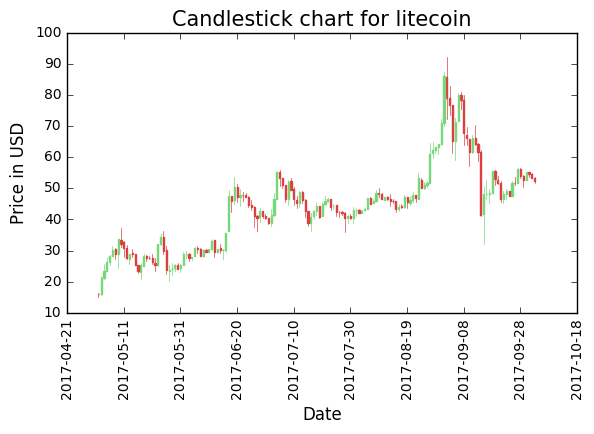

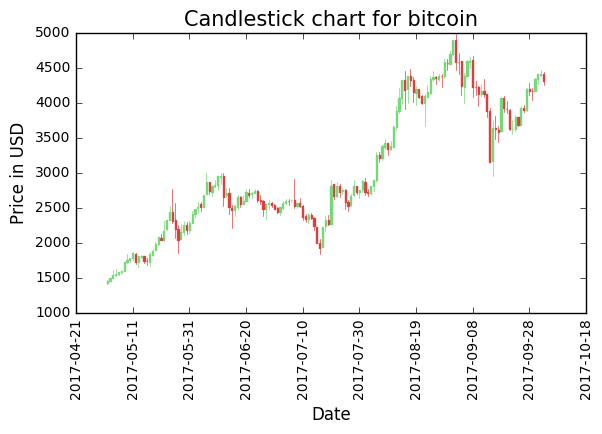

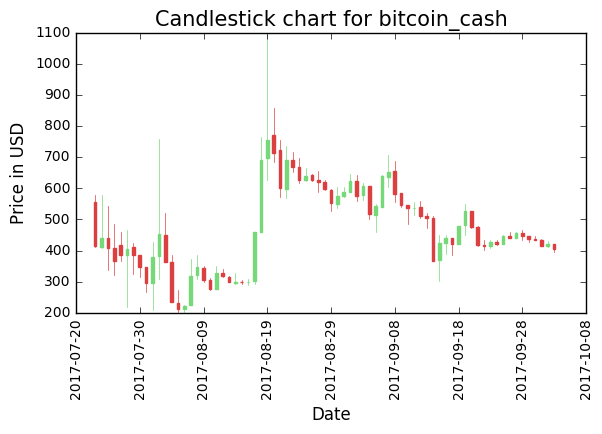

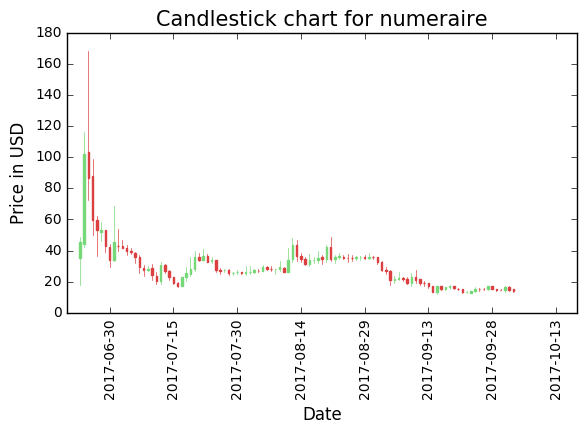

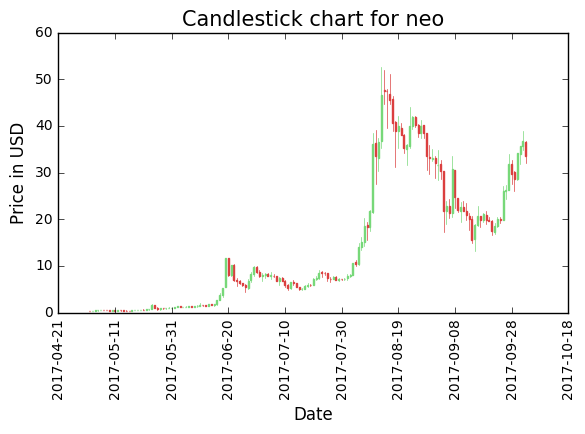

In [6]:
for coin in crypto_data:
    df = pd.DataFrame(crypto_data[coin])
    fig = plt.figure(figsize=(6,4))
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))
    temp_df = df[df['Date']>'2017-05-01']
    ohlc = []
    for ind, row in temp_df.iterrows():
        ol = [row['Date_mpl'],row['Open'], row['High'], row['Low'], row['Close'], row['Volume']]
        ohlc.append(ol)

    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))

    plt.xlabel("Date", fontsize=12)
    plt.xticks(rotation='vertical')
    plt.ylabel("Price in USD", fontsize=12 )
    title_str = "Candlestick chart for " + coin
    plt.title(title_str, fontsize=15)
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

In [7]:
del crypto_data['iota'], crypto_data['numeraire'], crypto_data['bitcoin_cash']

# Correlation Map by implementing different models

Correlation is a method of defining linear relationship between two variables. Here variables are different cryptocurrencies. Correlation here is calculated using three techniques such as: Spearman, Pearson, Kendall.

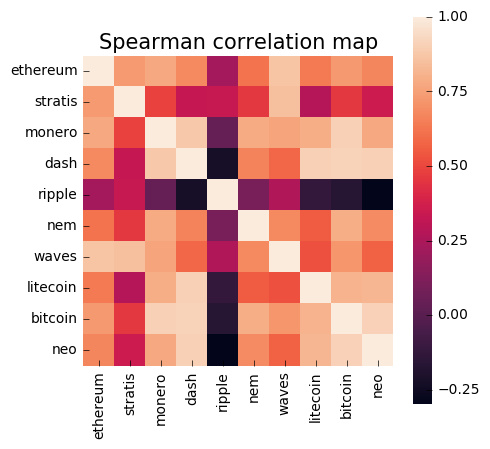

,ethereum,stratis,monero,dash,ripple,nem,waves,litecoin,bitcoin,neo
ethereum,1.000000,0.732084,0.776019,0.680765,0.230670,0.615269,0.866832,0.635456,0.726564,0.673348
stratis,0.732084,1.000000,0.489196,0.330550,0.339029,0.457966,0.850134,0.275247,0.459659,0.350628
monero,0.776019,0.489196,1.000000,0.882321,0.043838,0.786479,0.762118,0.796681,0.905473,0.773002
dash,0.680765,0.330550,0.882321,1.000000,-0.221101,0.662038,0.587892,0.907473,0.914531,0.906313
ripple,0.230670,0.339029,0.043838,-0.221101,1.000000,0.096394,0.262035,-0.122343,-0.165415,-0.299865
nem,0.615269,0.457966,0.786479,0.662038,0.096394,1.000000,0.684301,0.555973,0.794435,0.687436
waves,0.866832,0.850134,0.762118,0.587892,0.262035,0.684301,1.000000,0.523164,0.717617,0.572132
litecoin,0.635456,0.275247,0.796681,0.907473,-0.122343,0.555973,0.523164,1.000000,0.807568,0.820562
bitcoin,0.726564,0.459659,0.905473,0.914531,-0.165415,0.794435,0.717617,0.807568,1.000000,0.910046
neo,0.673348,0.350628,0.773002,0.906313,-0.299865,0.687436,0.572132,0.820562,0.910046,1.000000


In [8]:
df = pd.DataFrame() 
currency_name = []
df['Date'] = crypto_data['bitcoin'].Date 
df = df[df['Date']>'2017-05-01']
for coin in crypto_data:
    currency_name.append(coin)
    temp_df = crypto_data[coin]
    df[coin] = temp_df[temp_df['Date']>'2017-05-01'].Close

temp_df = df[currency_name]
corrmat = temp_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Spearman correlation map", fontsize=15)
plt.show()
temp_df.corr(method='spearman')

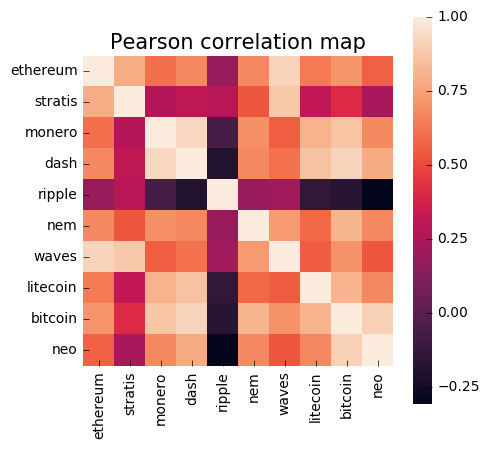

,ethereum,stratis,monero,dash,ripple,nem,waves,litecoin,bitcoin,neo
ethereum,1.000000,0.785574,0.603051,0.675973,0.181955,0.676897,0.921006,0.635205,0.713243,0.563220
stratis,0.785574,1.000000,0.272784,0.306310,0.283663,0.534678,0.879594,0.313985,0.410236,0.237412
monero,0.603051,0.272784,1.000000,0.931274,-0.064619,0.696245,0.556851,0.807678,0.862747,0.680151
dash,0.675973,0.306310,0.931274,1.000000,-0.195296,0.672795,0.610040,0.860210,0.921408,0.783124
ripple,0.181955,0.283663,-0.064619,-0.195296,1.000000,0.194928,0.214280,-0.138019,-0.169163,-0.309045
nem,0.676897,0.534678,0.696245,0.672795,0.194928,1.000000,0.733841,0.587752,0.815765,0.677668
waves,0.921006,0.879594,0.556851,0.610040,0.214280,0.733841,1.000000,0.553962,0.707216,0.538941
litecoin,0.635205,0.313985,0.807678,0.860210,-0.138019,0.587752,0.553962,1.000000,0.808501,0.673954
bitcoin,0.713243,0.410236,0.862747,0.921408,-0.169163,0.815765,0.707216,0.808501,1.000000,0.905562
neo,0.563220,0.237412,0.680151,0.783124,-0.309045,0.677668,0.538941,0.673954,0.905562,1.000000


In [9]:
df = pd.DataFrame() 
currency_name = []
df['Date'] = crypto_data['bitcoin'].Date 
df = df[df['Date']>'2017-05-01']
for coin in crypto_data:
    currency_name.append(coin)
    temp_df = crypto_data[coin]
    df[coin] = temp_df[temp_df['Date']>'2017-05-01'].Close

temp_df = df[currency_name]
corrmat = temp_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Pearson correlation map", fontsize=15)
plt.show()
temp_df.corr(method='pearson')

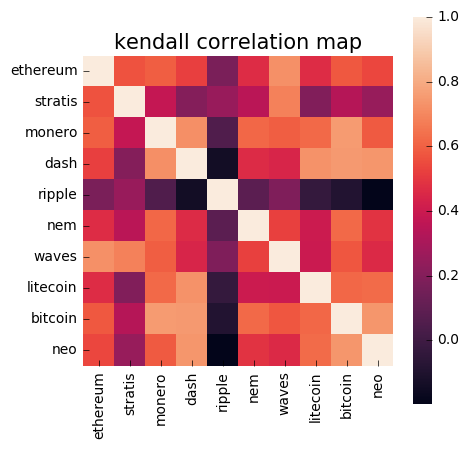

,ethereum,stratis,monero,dash,ripple,nem,waves,litecoin,bitcoin,neo
ethereum,1.000000,0.565774,0.594796,0.519502,0.175458,0.467887,0.725512,0.470312,0.581675,0.537646
stratis,0.565774,1.000000,0.379015,0.201694,0.256206,0.352315,0.683762,0.190320,0.338058,0.254215
monero,0.594796,0.379015,1.000000,0.722893,0.049690,0.617647,0.596302,0.622444,0.751885,0.586860
dash,0.519502,0.201694,0.722893,1.000000,-0.141014,0.465270,0.443289,0.731333,0.748136,0.738143
ripple,0.175458,0.256206,0.049690,-0.141014,1.000000,0.085379,0.189023,-0.033939,-0.088898,-0.198676
nem,0.467887,0.352315,0.617647,0.465270,0.085379,1.000000,0.523460,0.403000,0.622958,0.488436
waves,0.725512,0.683762,0.596302,0.443289,0.189023,0.523460,1.000000,0.397064,0.576964,0.459764
litecoin,0.470312,0.190320,0.622444,0.731333,-0.033939,0.403000,0.397064,1.000000,0.620045,0.625461
bitcoin,0.581675,0.338058,0.751885,0.748136,-0.088898,0.622958,0.576964,0.620045,1.000000,0.741160
neo,0.537646,0.254215,0.586860,0.738143,-0.198676,0.488436,0.459764,0.625461,0.741160,1.000000


In [10]:
df = pd.DataFrame() 
currency_name = []
df['Date'] = crypto_data['bitcoin'].Date 
df = df[df['Date']>'2017-05-01']
for coin in crypto_data:
    currency_name.append(coin)
    temp_df = crypto_data[coin]
    df[coin] = temp_df[temp_df['Date']>'2017-05-01'].Close

temp_df = df[currency_name]
corrmat = temp_df.corr(method='kendall')
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("kendall correlation map", fontsize=15)
plt.show()
temp_df.corr(method='kendall')

# Prediction of Future values of Cryptocurrencies

For the prediction of future values package used here is Fbprophet. Fbprophet is a package used for predicting Time-series data.

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=Tr

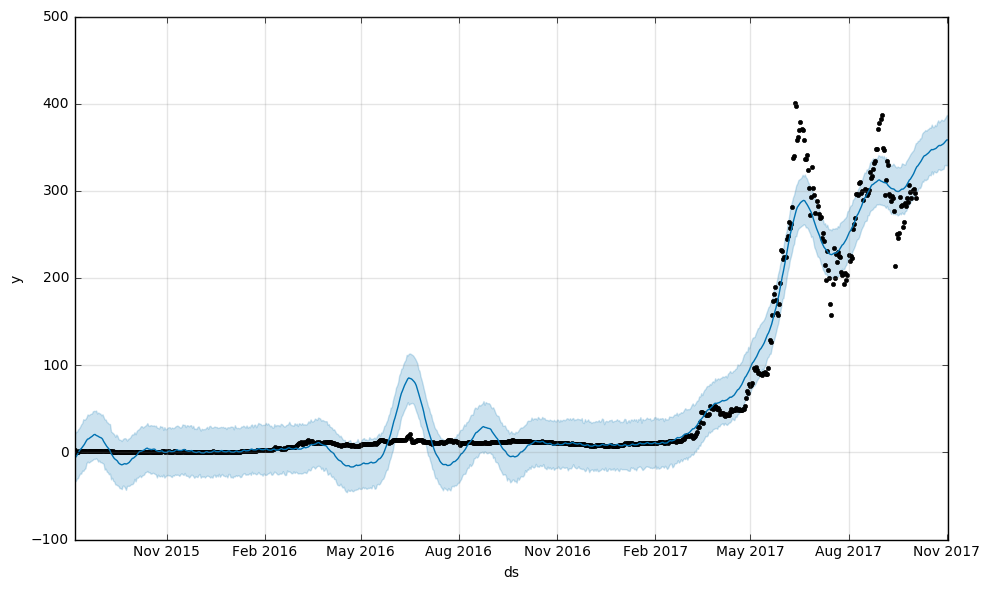

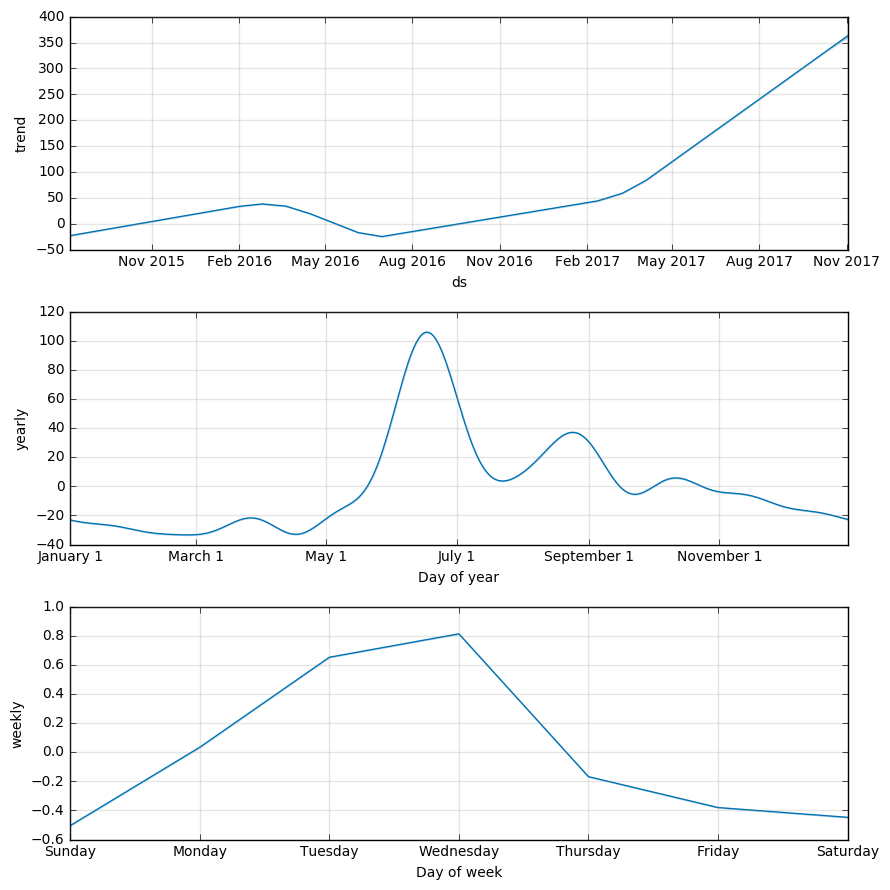

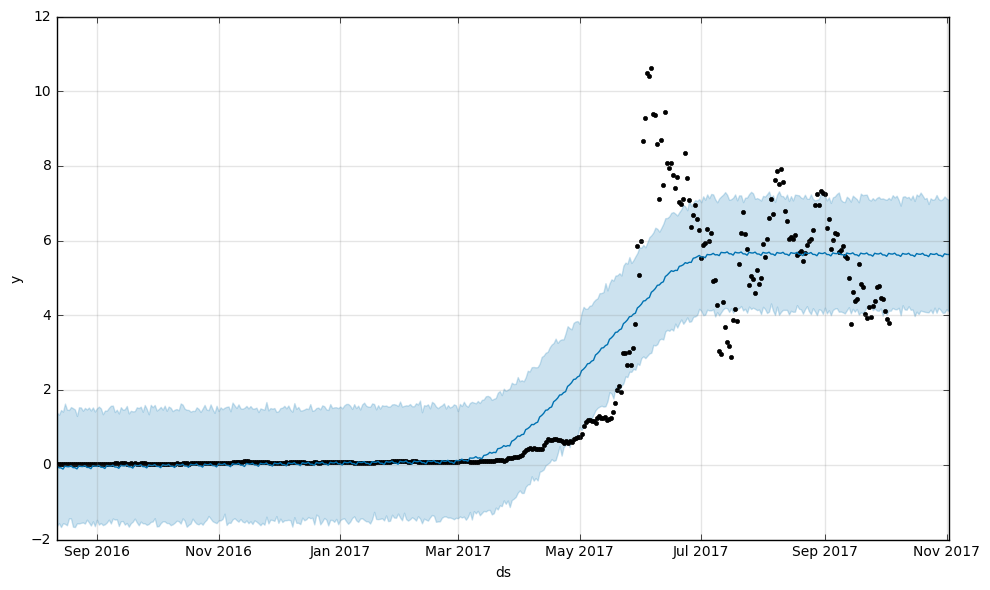

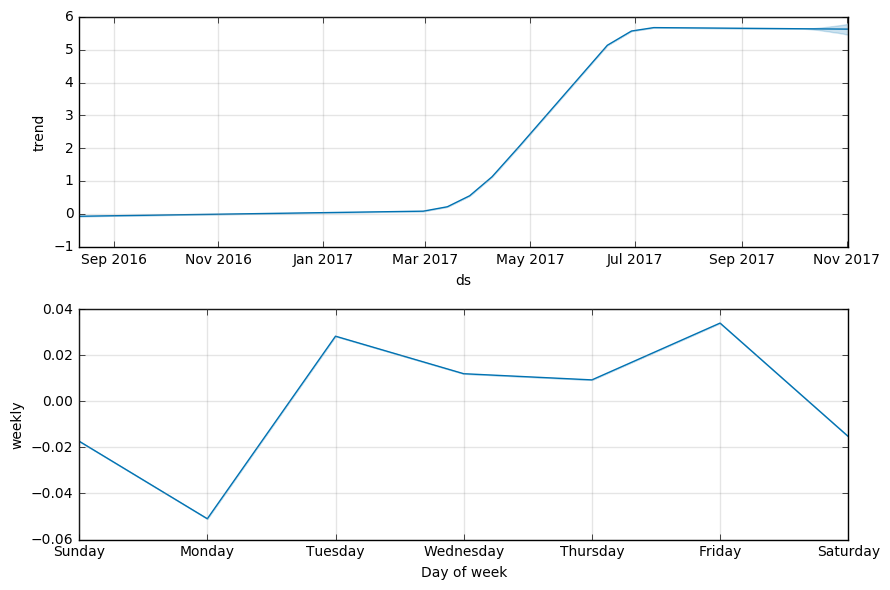

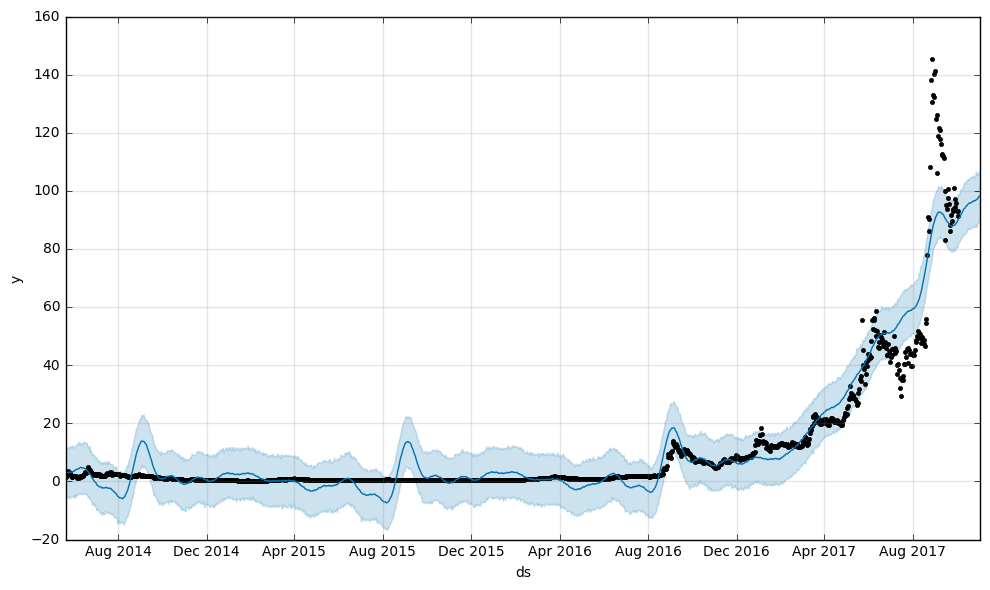

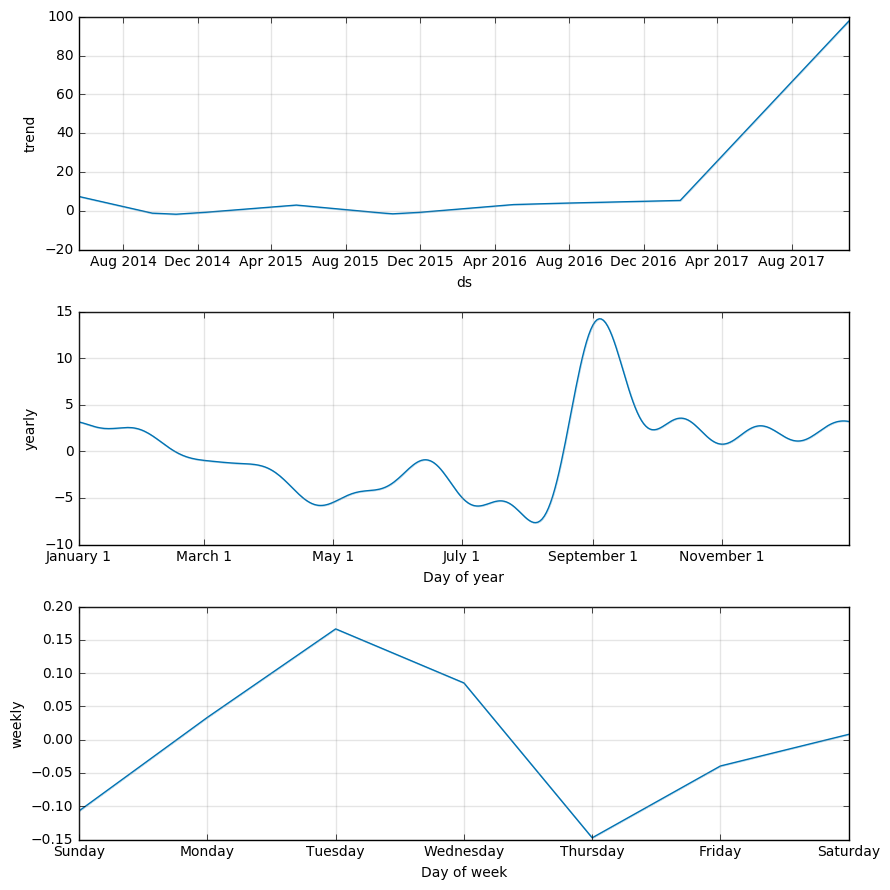

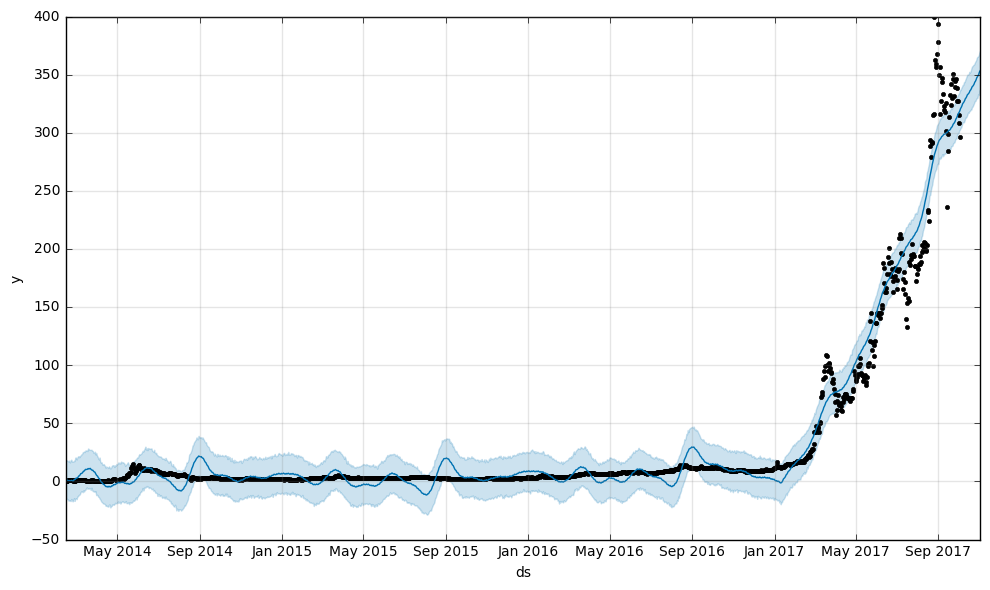

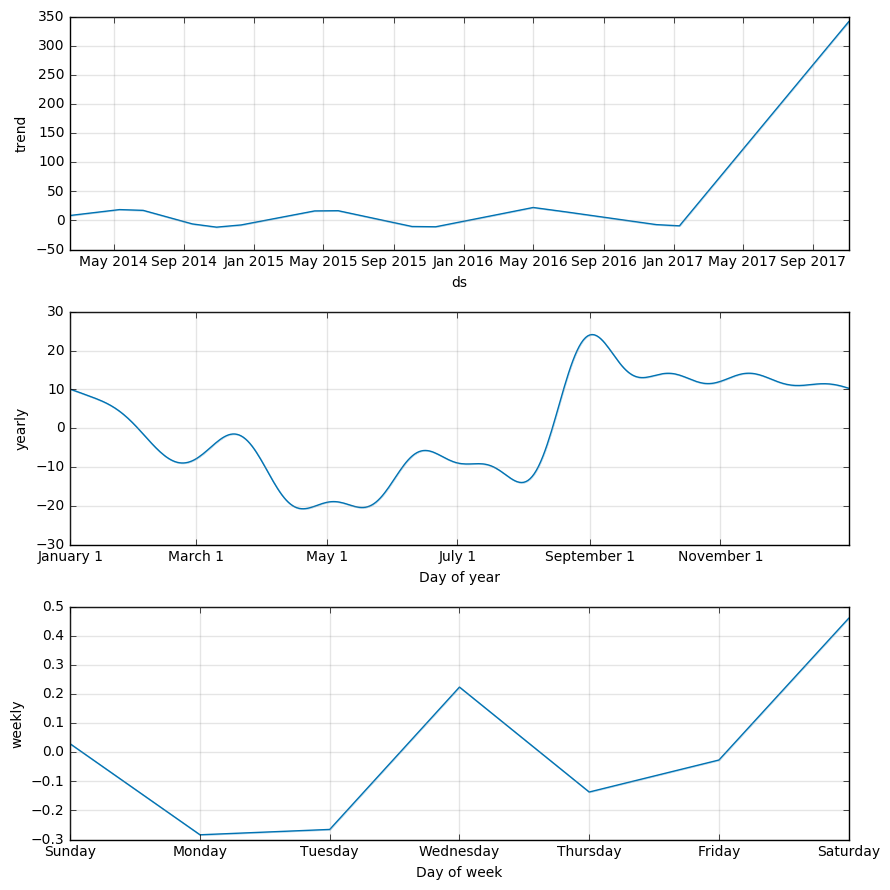

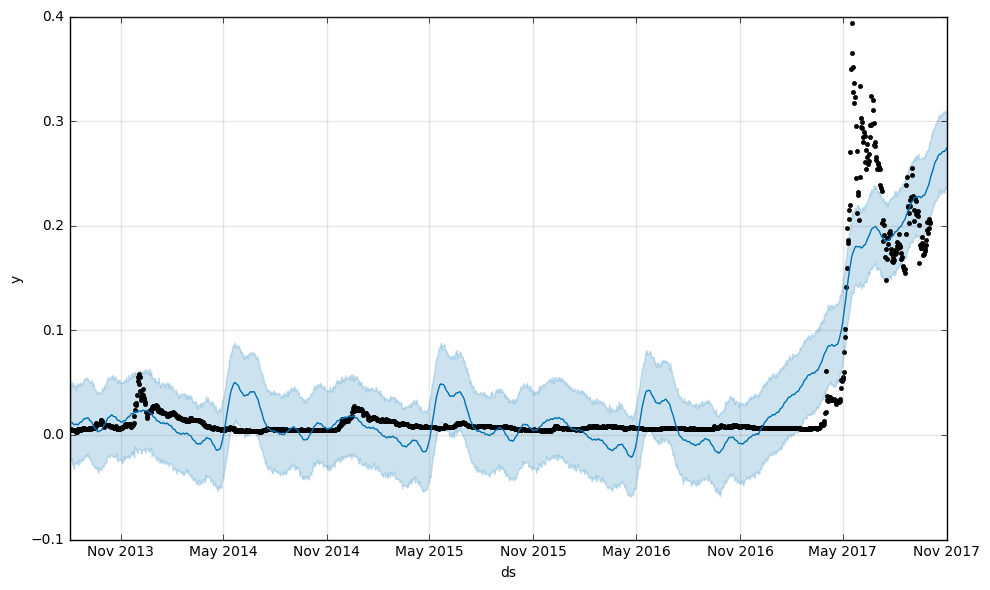

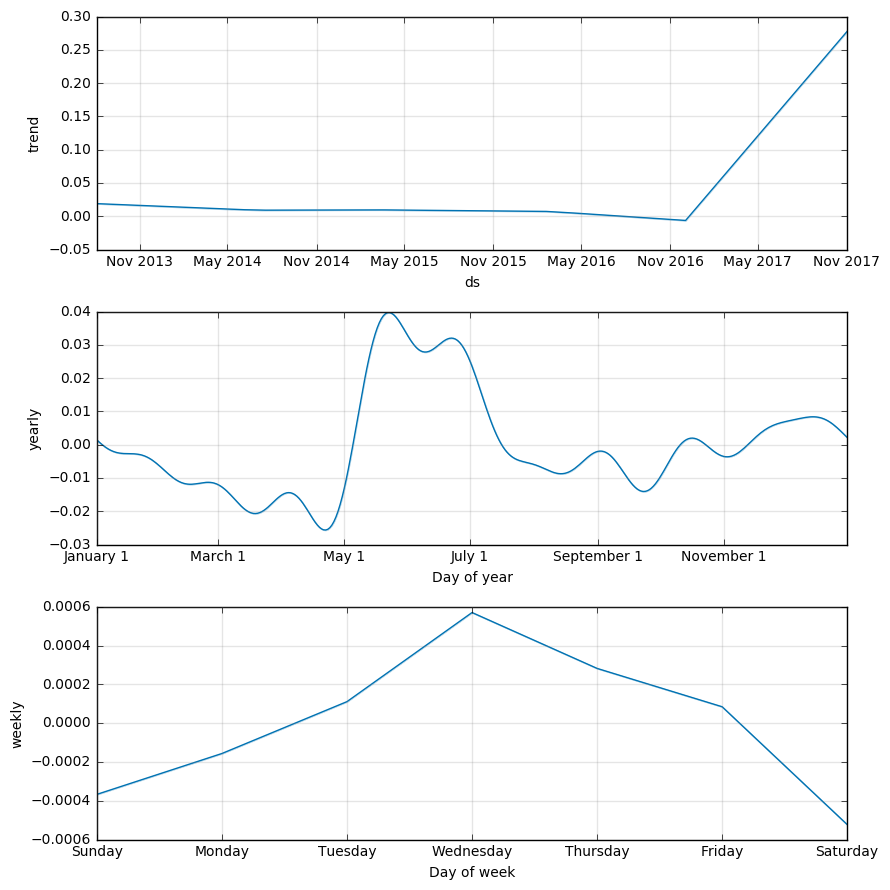

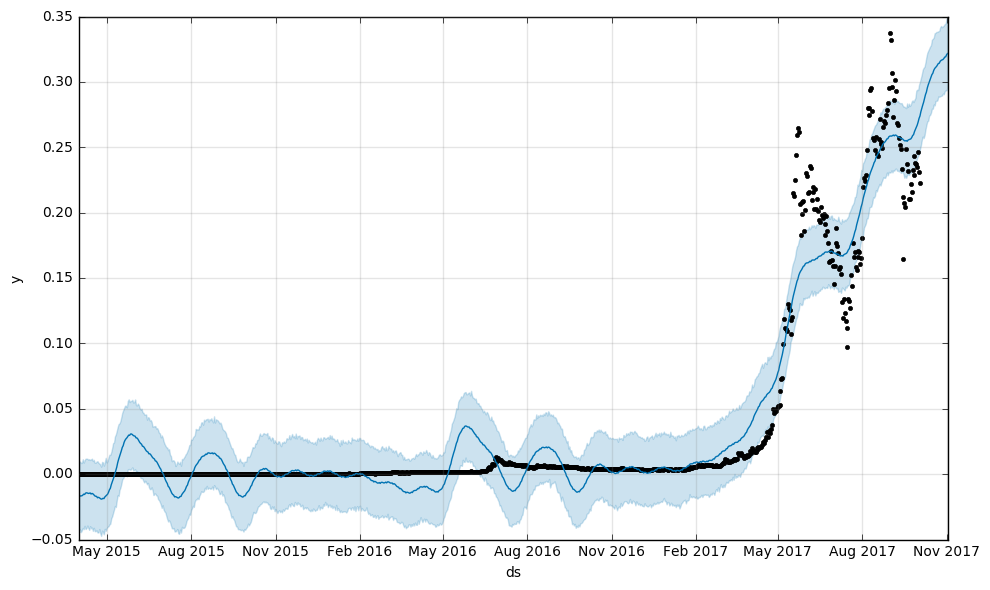

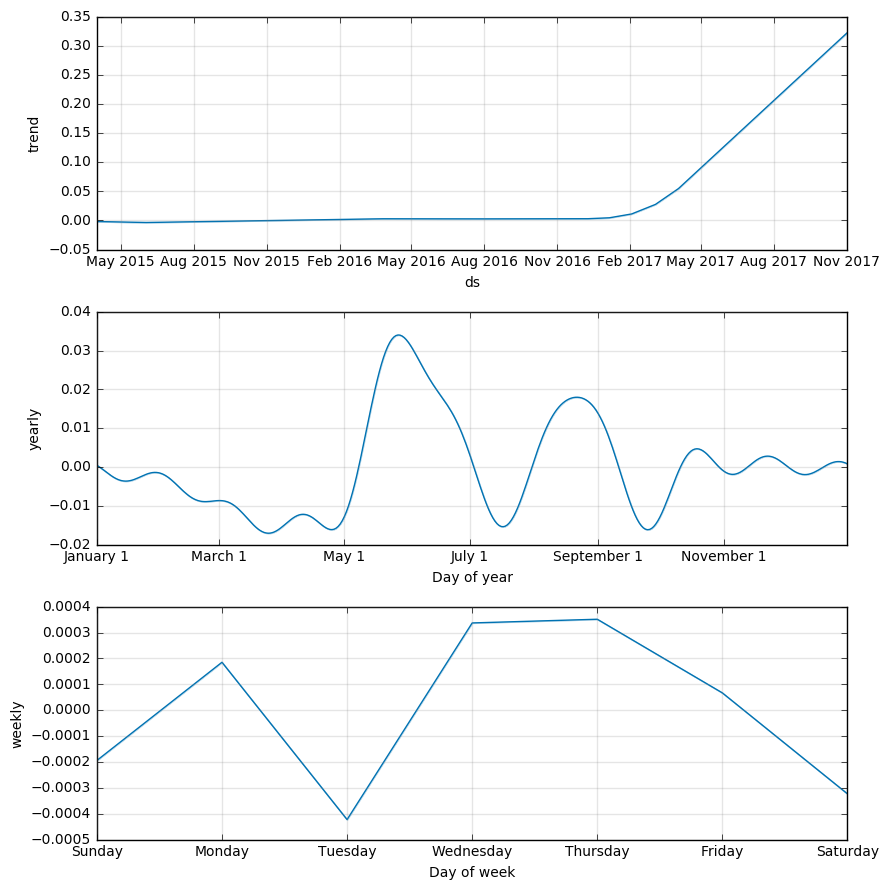

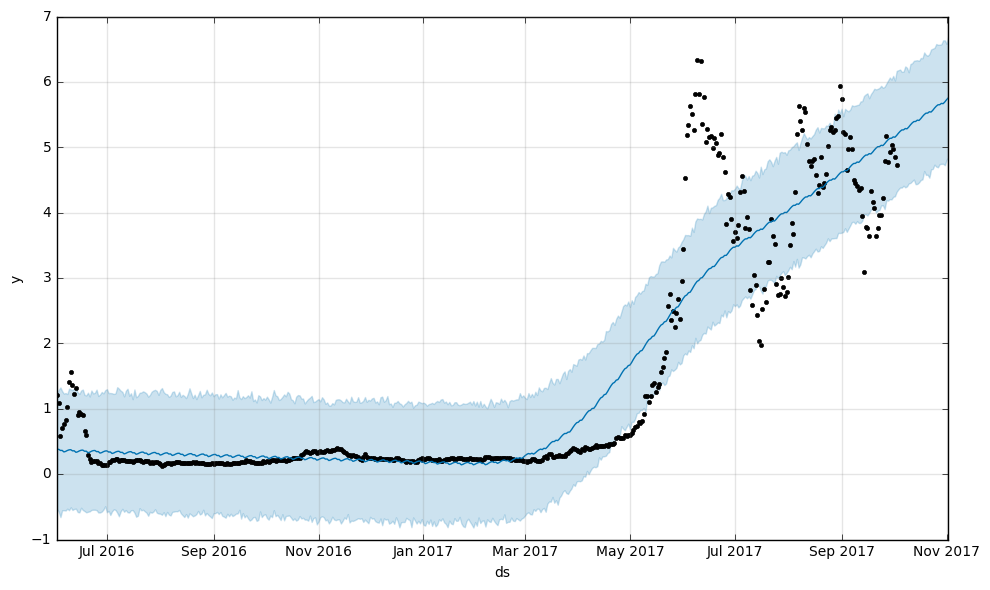

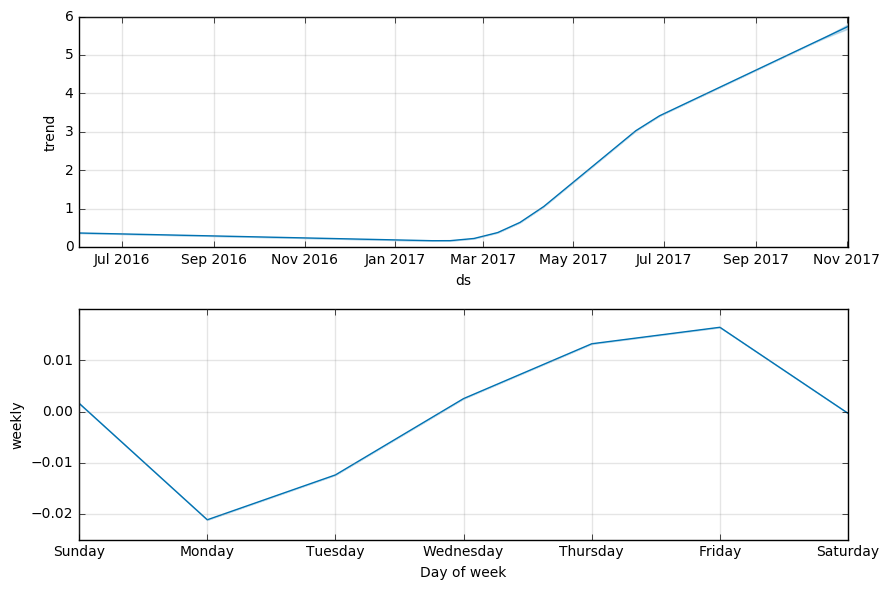

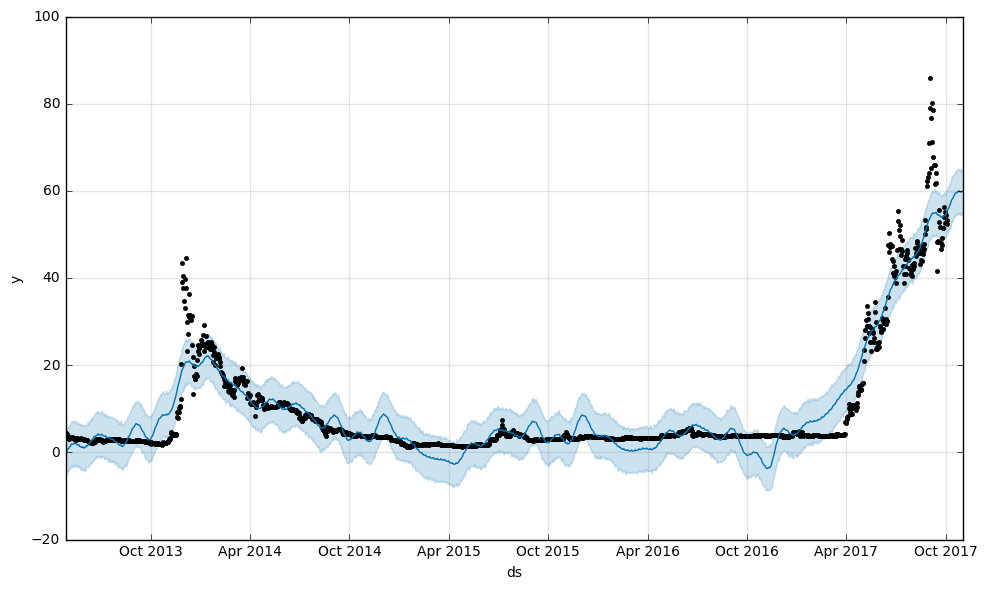

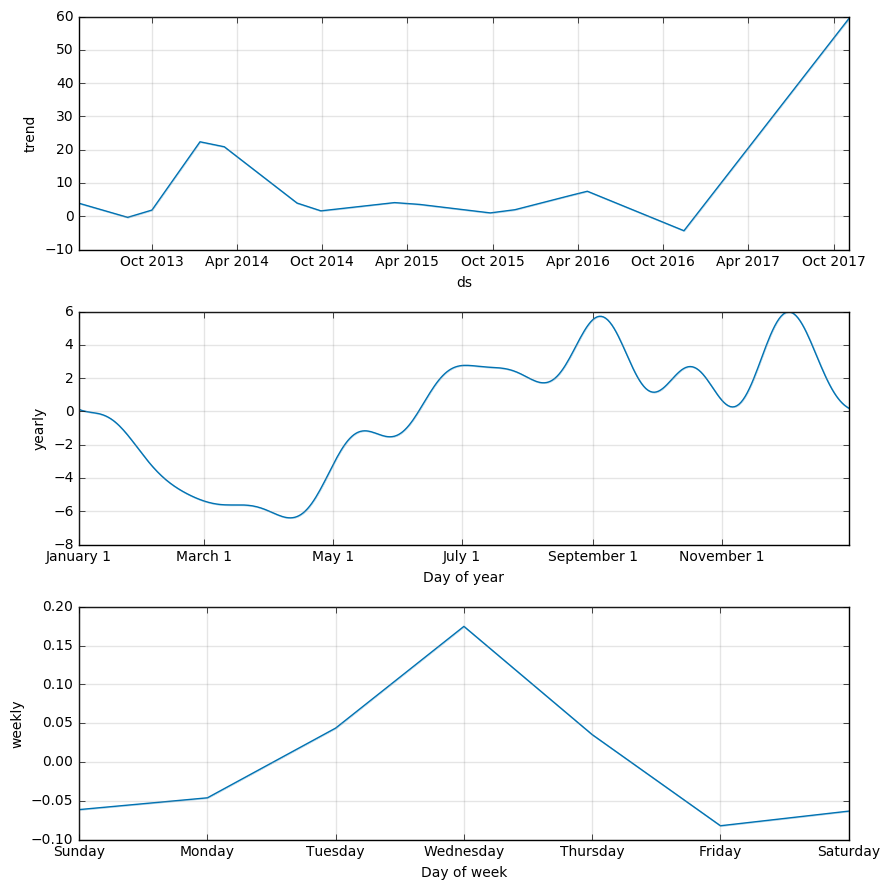

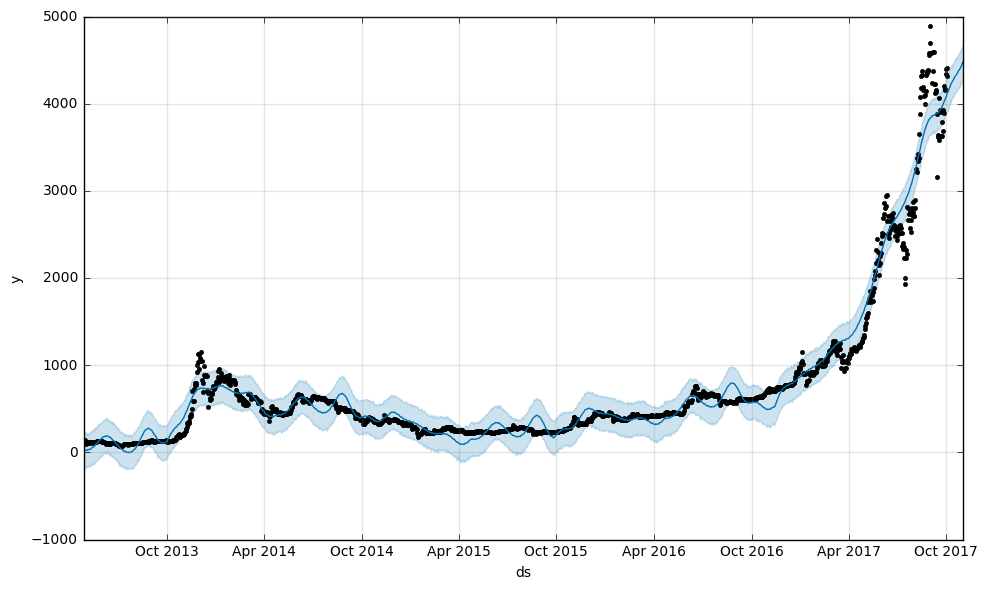

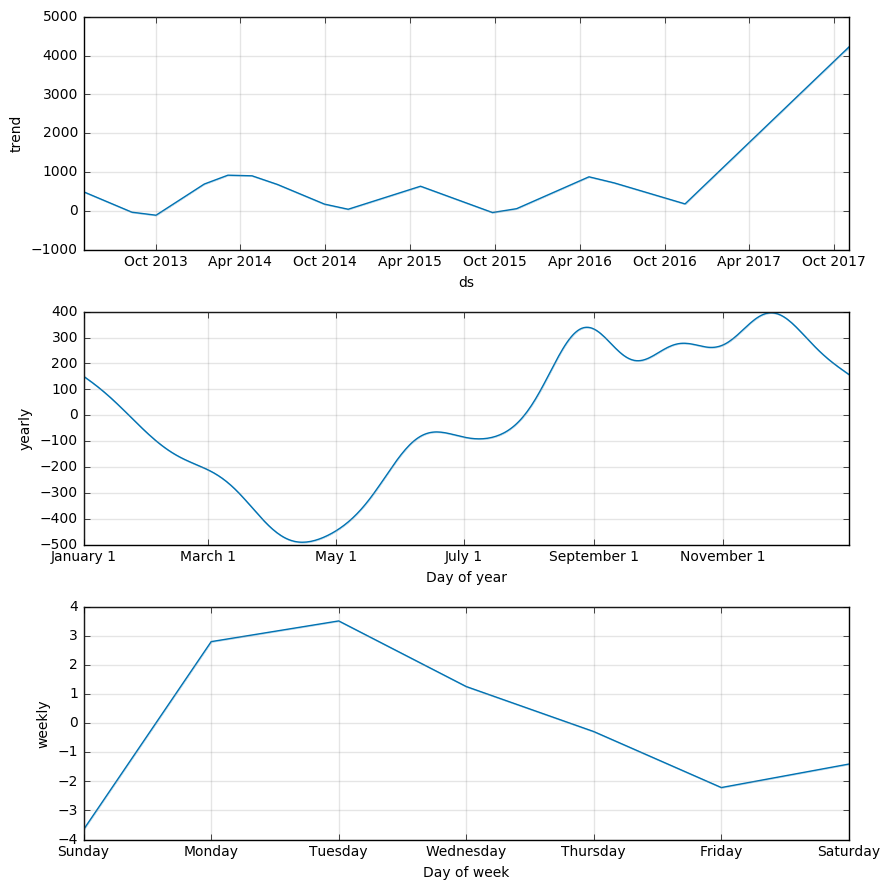

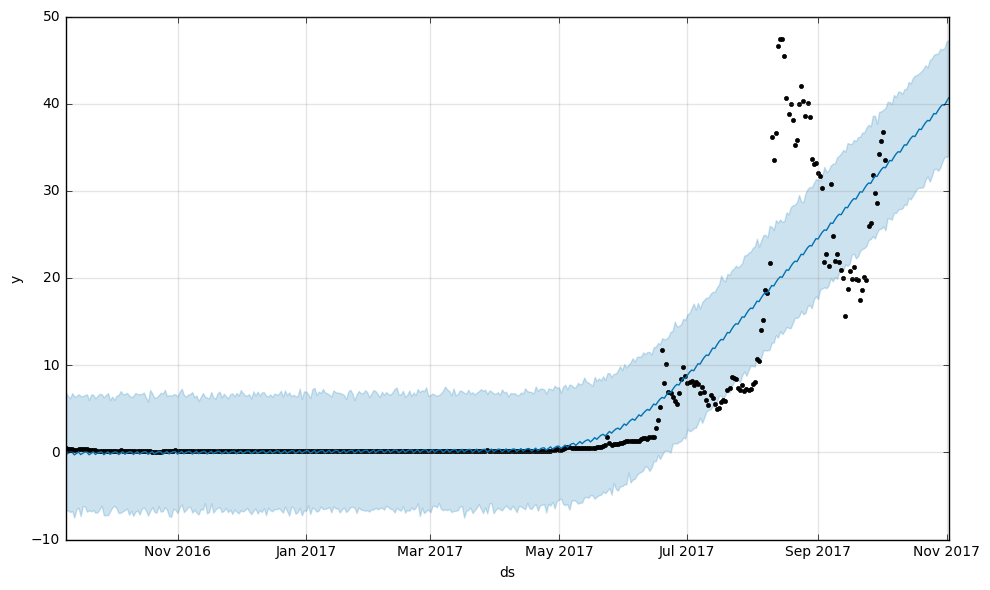

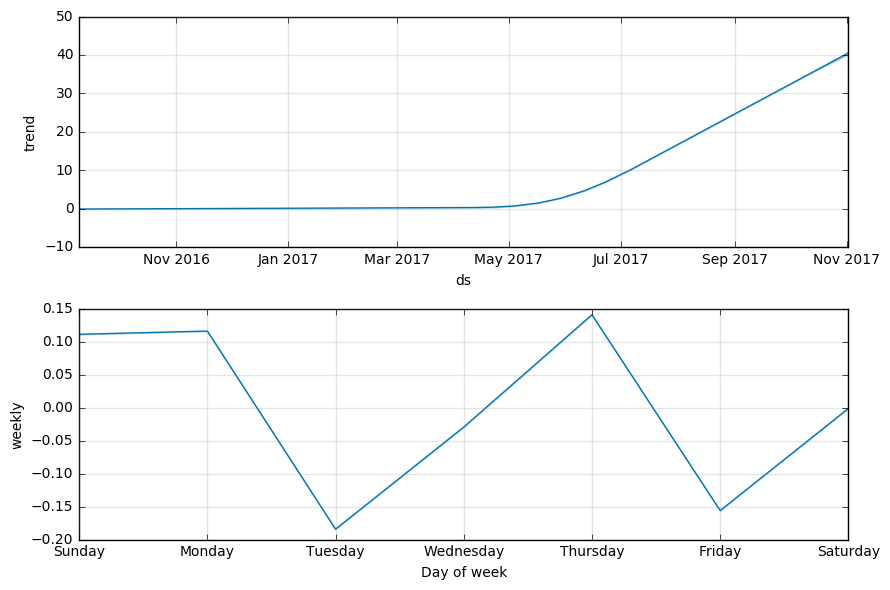

In [11]:
for coin in crypto_data:
    df = pd.DataFrame(crypto_data[coin])
    temp_df = pd.DataFrame()
    temp_df['ds'] = df['Date']
    temp_df['y'] = df['Close']
    model = Prophet()
    model.fit(temp_df)
    future = model.make_future_dataframe(periods = 30)
    forecast = model.predict(future)
    title_str = "predicted value of "+ coin
    model.plot(forecast)
    model.plot_components(forecast)

# Using ARIMA MODEL for prediction

For using ARIMA model imported the package from statsmodels.tsa.arima_model and it is used for prediction of future prices 

In [16]:
df_bitcoin = pd.DataFrame(crypto_data['bitcoin'])

df_bitcoin = df_bitcoin[['Date','Close']]
df_bitcoin.set_index('Date', inplace = True)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1619
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8731.852
Method:                       css-mle   S.D. of innovations             53.218
Date:                Tue, 31 Oct 2017   AIC                          17477.704
Time:                        19:42:13   BIC                          17515.430
Sample:                    10-02-2017   HQIC                         17491.704
                         - 04-28-2013                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            -2.5834      1.245     -2.076      0.038        -5.023    -0.144
ar.L1.D.Close    -0.0583      0.025     -2.346      0.019        -0.107    -0.010
ar.L2.D.Close     0.0097      0.025     

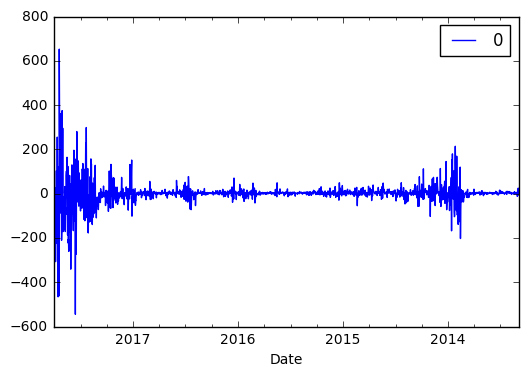

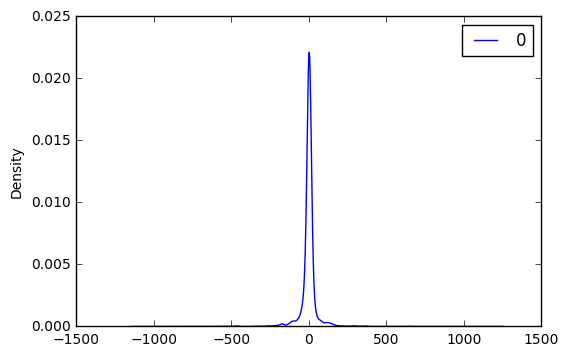

                 0
count  1619.000000
mean     -0.000806
std      53.238108
min    -544.713616
25%      -4.746757
50%       2.072113
75%       7.299570
max     652.476798


In [19]:
# fit model
model = ARIMA(df_bitcoin, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Predicting future values and calculating mean squared error.

Test MSE: 1570.543


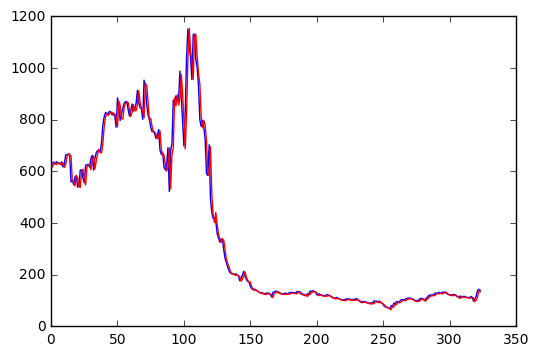

In [21]:

X = df_bitcoin.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()